In [1]:
# Reto extrayendo información

In [2]:
# importamos librerias
import requests
from bs4 import BeautifulSoup

In [3]:
# Obtenemos la pagina web con el metodo requests.get
link_principal = 'https://www.pagina12.com.ar/'
pagina_principal = requests.get(link_principal)
pagina_principal.status_code

200

In [4]:
# parseamos la pagina web
soup = BeautifulSoup(pagina_principal.text,'lxml')
type(soup)

bs4.BeautifulSoup

In [20]:
 secciones = soup.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
    #Busca los tag a para optener el href que contiene el link de la seccion
    #recorremos el array de tag a y obtemos los elementos href que contienen links
 href_link_secciones=[link.a.get('href') for link in secciones]
 href_link_secciones


['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/ciencia']

In [5]:
def obtener_notas(soup):
    #Función  que recibe un objeto de BeautifullSoup de una página de una sección y devuelve una lista de URLS a las notas de esa sección
    #Secciones -> creamos un array de todos los elementos con el tag DIV que tengan el atributo class=p12-dropdown-column
    # Selecionamos nuestro primer elemento
    # lista vacia para links de notas de secciones
    URL = []
    
    secciones = soup.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
    #Busca los tag a para optener el href que contiene el link de la seccion
    #recorremos el array de tag a y obtemos los elementos href que contienen links
    href_link_secciones=[link.a.get('href') for link in secciones]
    #seleccionamos el primer link que corresponde a la seccion el pais
    pagina_seccion_el_pais= requests.get(href_link_secciones[0])
     #parseamos la pagina seccion el pais
    soup_pagina_seccion_el_pais= BeautifulSoup(pagina_seccion_el_pais.text,'lxml')
     #la pagina de articulos de noticias se dividen en 3 sectores
    #Top (1 noticia principal) - Semi(2 noticias semiprincipales) -  articulos (el resto de noticias)

    #TOP
    top_noticias_seccion_el_pais = soup_pagina_seccion_el_pais.find('div', attrs={'class':'article-item__content'})
    # Obtener el link
    link_top_noticias_seccion_el_pais = [link_principal + top_noticias_seccion_el_pais.a.get('href')]
    #SEMI
    semi_noticias_seccion_el_pais = soup_pagina_seccion_el_pais.find_all('h3', attrs={'class':'title ff-26px-w800-ls-07'})
    link_semi_noticias_seccion_el_pais=[link_principal + link.a.get('href') for link in semi_noticias_seccion_el_pais]
    # ARTICULOS
    articulos_noticias_seccion_el_pais= soup_pagina_seccion_el_pais.find_all('h4', attrs={'class':'title is-display-inline ff-22px-w700-ls-07'})
    link_articulos_noticias_seccion_el_pais=[link_principal + link.a.get('href') for link in articulos_noticias_seccion_el_pais]

    URL.extend(link_top_noticias_seccion_el_pais)    
    URL.extend(link_semi_noticias_seccion_el_pais)
    URL.extend(link_articulos_noticias_seccion_el_pais)

    return URL

   

In [6]:
lista_notas = (obtener_notas(soup))
lista_notas

['https://www.pagina12.com.ar//595717-los-coqueteos-de-macri-con-milei-repiquetean-en-la-interna-d',
 'https://www.pagina12.com.ar//595715-encuentro-federal-de-derechos-humanos-sin-memoria-verdad-y-j',
 'https://www.pagina12.com.ar//595713-un-encuentro-con-la-red-nacional-de-mujeres-en-el-senado',
 'https://www.pagina12.com.ar//595710-milagro-sala-tuvo-una-primera-operacion-y-seguira-internada',
 'https://www.pagina12.com.ar//595696-horacio-rodriguez-larreta-sobre-la-derrota-en-las-paso-tenia',
 'https://www.pagina12.com.ar//595708-los-represores-que-garantizaban-el-funcionamiento-del-sherat',
 'https://www.pagina12.com.ar//595704-el-pedido-de-prision-perpetua-por-el-crimen-de-wenceslao-ped',
 'https://www.pagina12.com.ar//595702-cfk-se-reunio-con-la-red-nacional-de-mujeres-argentinas',
 'https://www.pagina12.com.ar//595680-un-manual-para-discutir-el-enganoso-y-endeble-discurso-liber',
 'https://www.pagina12.com.ar//595661-convocatoria-a-la-comunidad-de-las-artes-visuales',
 'https://w

In [7]:
url_nota = lista_notas[0]
# Guarda la primera url
print(url_nota)

https://www.pagina12.com.ar//595717-los-coqueteos-de-macri-con-milei-repiquetean-en-la-interna-d


In [8]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        
        # Extraer el titulo
        try:
            titulo = s_nota.find('h1')
            print('Titulo: ' + titulo.text)
        except AttributeError:
            print('Titulo: Vacío')
       
        # Extraer la fecha
        try:
            fecha = s_nota.find('time', attrs={'datetime': True}).get('datetime')
            print('Fecha publicación: ' + fecha)
        except AttributeError:
            print('Fecha: vacío')
        
        # Extraer copete
        try:
            copete = s_nota.find('h2', attrs={'class':'h4 ff-16px-w700'}).get_text()
            print('Copete: ' + copete)
        except AttributeError:
            print('Copete: Vacío')
        
        # Exteraer volanta
        try:
          volanta = s_nota.find('h2', attrs={'class':'h3.ff-20px-w400'}).get_text()
          print('Volanta: ' + volanta)
        except AttributeError: 
          print('Volanta: vacío')
        
        # Extraer cuerpo
        try:
            cuerpo = s_nota.find('div', attrs={'class':'article-main-content article-text'}).get_text()
            print('Cuerpo: ' + cuerpo)
        except AttributeError:
            print('Cuerpo: vacío')
        # Extraer autor
        try:
            autor = s_nota.find('div', attrs={'class':'author-name.ff-14px-w800'}).get_text()
            print('Autor: ' + autor)
        except AttributeError:
            print('Autor vacío')
except Exception as e:
    print('Error:')
    print(e)
    print('\n')
 # If status is 200 then convert in soup 

Titulo: Los coqueteos de Macri con Milei repiquetean en la interna de Juntos por el Cambio
Fecha publicación: 2023-10-06T22:53:56-03:00
Copete: El expresidente respaldó a Bullrich pero evitó responder si apoyaría un gobierno del libertario
Volanta: vacío
Cuerpo: El coqueteo político del expresidente Mauricio Macri con el ultraderechista libertario Javier Milei no tiene fin y recalienta la interna de Juntos por el Cambio, a 15 días de las elecciones generales. En una entrevista abierta durante un encuentro empresario realizado en Guatemala, el ex mandatario respaldó a la candidata presidencial de Juntos por el Cambio Patricia Bullrich, pero se negó a contestar si apoyaría un gobierno de Milei. Días atrás, durante una charla en los Estados Unidos con alumnos de Harvard, él mismo había propuesto apoyar un eventual gobierno de la Libertad Avanza y desató la ira de su exministra de Seguridad. En medio de la tensión cambiemita, luego de transitar el “duelo” de la interna presidencial, reapar

In [9]:
#Extraer imagenes
imagenes = s_nota.find_all('div', attrs={'class':'image-wrapper'}) 
#imagenes = media.find_all('img') # Extraer todas la imagenes
imagenes

[<div class="image-wrapper"><figure><figure class="object-fit-block--contain intrinsic-container intrinsic-container-3x2"><img alt="" class="" src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2023-10/775596-save-20231006-223440.jpg?h=f2b6299e&amp;itok=1Nzur_zX"/></figure></figure></div>]

In [10]:
if len(imagenes) == 0: # si las imagenes existen
    print('no se encontraron imagenes')
else:
    imagen = imagenes[0] 
    img_src = imagen.find('img').get('src')
    print(img_src) # imprime solo la src de la etiqueta.

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2023-10/775596-save-20231006-223440.jpg?h=f2b6299e&itok=1Nzur_zX


In [11]:
img_req = requests.get(img_src) # Requests solo a la imagen

In [12]:
img_req.status_code

200

In [13]:
from IPython.display import Image

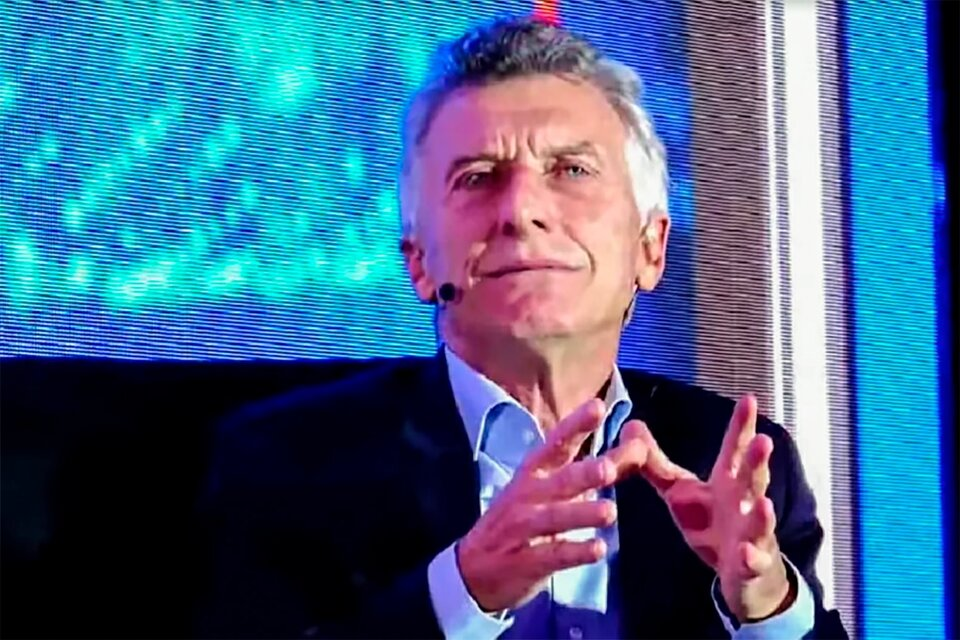

In [14]:
Image(img_req.content)